In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
df = pd.read_csv("C://Users//ngigi//Desktop//ML_AI capstone Project//House_Price_Prediction.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3,1,1,0,1,0,0,0,0,0


In [2]:
df.head

<bound method NDFrame.head of      Unnamed: 0   price   lotsize  bedrooms  bathrms  stories  garagepl  \
0             0   42000  8.674197         3        1        2         1   
1             1   38500  8.294050         2        1        1         0   
2             2   49500  8.026170         3        1        1         0   
3             3   60500  8.802372         3        1        2         0   
4             4   61000  8.757784         3        1        1         0   
..          ...     ...       ...       ...      ...      ...       ...   
546         546  107500  8.699515         3        2        4         1   
547         547  108000  8.699515         3        2        3         0   
548         548  113750  8.699515         3        1        4         2   
549         549  120000  8.853665         3        1        4         2   
550         550   70000  9.464983         3        1        1         2   

     driveway_yes  recroom_yes  fullbase_yes  gashw_yes  airco_yes  \

In [3]:
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,546,107500,8.699515,3,2,4,1,1,0,0,0,1,0
547,547,108000,8.699515,3,2,3,0,1,0,0,0,1,0
548,548,113750,8.699515,3,1,4,2,1,1,0,0,1,0
549,549,120000,8.853665,3,1,4,2,1,0,0,0,1,0


In [4]:
df.corr

<bound method DataFrame.corr of      Unnamed: 0   price   lotsize  bedrooms  bathrms  stories  garagepl  \
0             0   42000  8.674197         3        1        2         1   
1             1   38500  8.294050         2        1        1         0   
2             2   49500  8.026170         3        1        1         0   
3             3   60500  8.802372         3        1        2         0   
4             4   61000  8.757784         3        1        1         0   
..          ...     ...       ...       ...      ...      ...       ...   
546         546  107500  8.699515         3        2        4         1   
547         547  108000  8.699515         3        2        3         0   
548         548  113750  8.699515         3        1        4         2   
549         549  120000  8.853665         3        1        4         2   
550         550   70000  9.464983         3        1        1         2   

     driveway_yes  recroom_yes  fullbase_yes  gashw_yes  airco_yes 

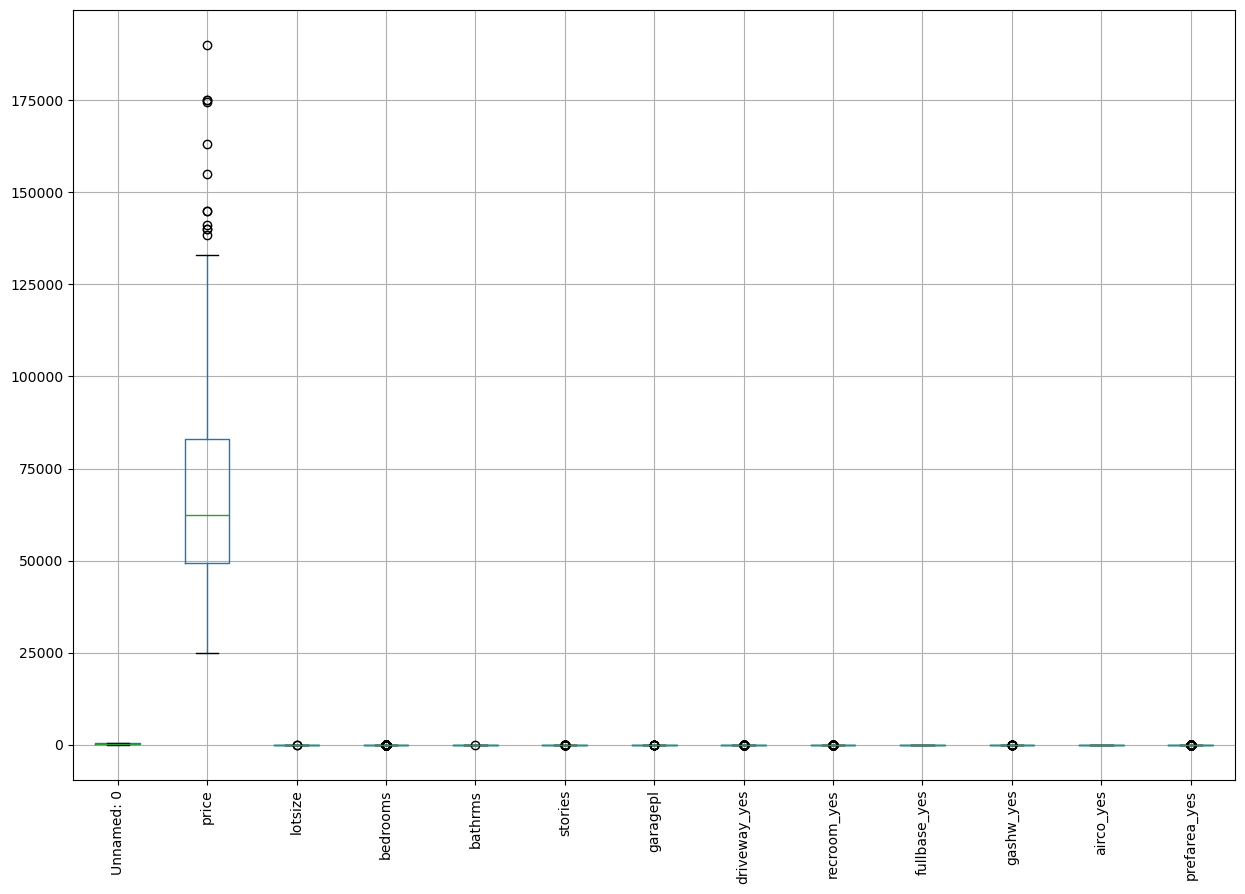

In [5]:
# Checking for outliers in the dataset using boxplots
plt.figure(figsize=(15, 10))
df.boxplot(rot=90)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['price', 'Unnamed: 0'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((440, 11), (111, 11), (440,), (111,))

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Output the coefficients and intercept of the trained model
lr_model.coef_, lr_model.intercept_

(array([19056.87143194,  1617.12766739, 13851.41411865,  6944.38631808,
         5162.15336519,  6070.0934674 ,  5116.91276726,  6422.60269602,
        14810.95910601, 12659.9625882 ,  9113.65267578]),
 -146830.453005129)

In [8]:
# Make predictions on the test dataset using the trained model
predictions = lr_model.predict(X_test)
predictions[:10]  # Display the first 10 predictions

array([103179.04700033,  41521.62294265,  44407.52759946,  74410.37204432,
        58562.74045987,  72320.58448348,  69133.83769335,  98332.14777001,
        48144.86363445,  66508.5438107 ])

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model on test data
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

mae, rmse, r2

(10714.764314065294, 13939.097802049351, 0.688268916722941)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
# Define the parameter grid for GridSearchCV
param_grid = {'fit_intercept': [True, False]}  # Remove 'normalize' if using scikit-learn >= 1.2.0

# Initialize the linear regression model
lr = LinearRegression()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Get the best estimator from grid search
best_lr_model = grid_search.best_estimator_

# Make predictions on the test dataset using the best estimator
predictions = best_lr_model.predict(X_test)

# Evaluate model on test data
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Best Parameters: {'fit_intercept': True}
Best Score: 0.6450720284188088
Mean Absolute Error: 10714.764314065294
Root Mean Squared Error: 13939.097802049351
R^2 Score: 0.688268916722941


In [11]:
# Display the result of GridSearchCV for linear regression model
def display_grid_search_results(grid_search):
    model_name = type(best_lr_model).__name__
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    return model_name, best_score, best_params

model_name, best_score, best_params = display_grid_search_results(grid_search)
model_name, best_score, best_params

('LinearRegression', 0.6450720284188088, {'fit_intercept': True})